In [33]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# путь к твоему датасету
PATH = "synthetic_dataset.jsonl"

rows = []
with open(PATH, "r", encoding="utf-8") as f:
    for line in f:
        rows.append(json.loads(line))

df = pd.DataFrame(rows)

print("Rows:", len(df))
print(df.head())


Rows: 1000
                                          tweet_text                 persona  \
0  The price of living is unsustainable for too m...  wealthy business owner   
1  Just got a raise at my part-time job, but I'm ...      struggling student   
2  We must tackle the systemic flaws that leave o...      political activist   
3  Just finished a chaotic shift with understaffe...                   nurse   
4  Just got a pay cut at my part-time job due to ...      struggling student   

                                              labels  \
0  {'Cost of Living': 0, 'Healthcare': 0, 'Educat...   
1  {'Cost of Living': 0, 'Healthcare': 0, 'Educat...   
2  {'Cost of Living': 0, 'Healthcare': 0, 'Educat...   
3  {'Cost of Living': 0, 'Healthcare': 0, 'Educat...   
4  {'Cost of Living': -1, 'Healthcare': 0, 'Educa...   

                                               noise  
0  {'implicit': False, 'label_noise': False, 'per...  
1  {'implicit': True, 'label_noise': False, 'pers...  
2  {'i

In [34]:
# labels -> отдельные колонки
labels_df = df["labels"].apply(pd.Series)

df_full = pd.concat(
    [df.drop(columns=["labels"]), labels_df],
    axis=1
)

ASPECTS = labels_df.columns.tolist()
print("Aspects:", ASPECTS)


Aspects: ['Cost of Living', 'Healthcare', 'Education', 'Personal Security', 'Employment', 'Transportation', 'Government', 'Environment', 'Social Equality', 'Taxation']


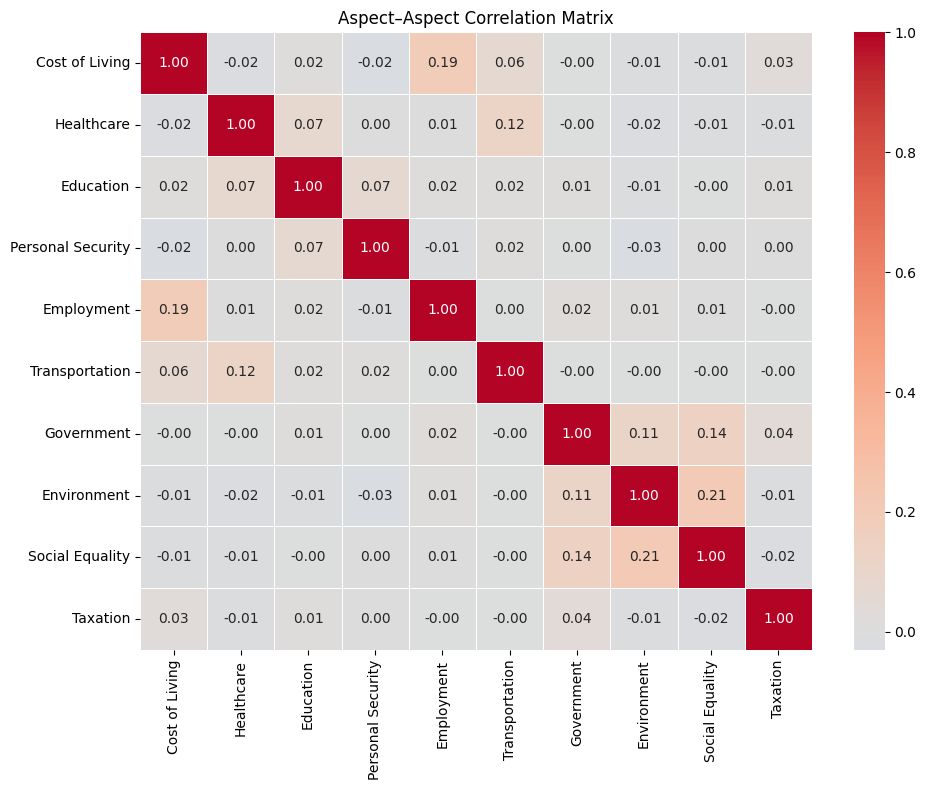

In [35]:
corr = df_full[ASPECTS].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Aspect–Aspect Correlation Matrix")
plt.tight_layout()
plt.show()


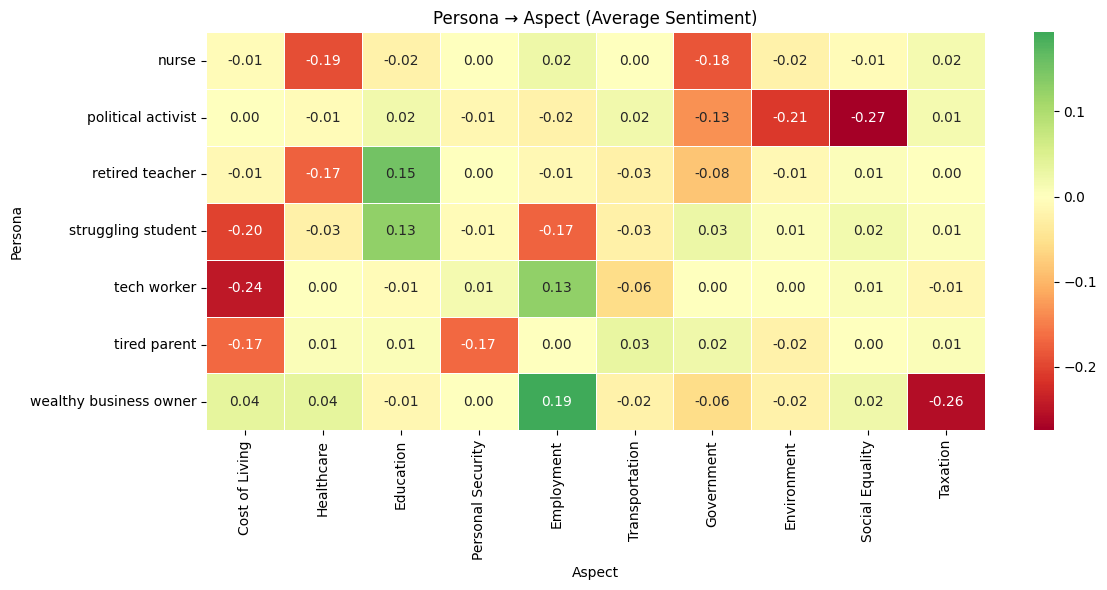

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# df_full — тот, что у тебя после разворота labels
# колонки: tweet_text, persona, ... + ASPECTS

ASPECTS = [
    "Cost of Living", "Healthcare", "Education", "Personal Security",
    "Employment", "Transportation", "Government", "Environment",
    "Social Equality", "Taxation"
]

persona_aspect_mean = (
    df_full
    .groupby("persona")[ASPECTS]
    .mean()
)

plt.figure(figsize=(12, 6))
sns.heatmap(
    persona_aspect_mean,
    annot=True,
    fmt=".2f",
    cmap="RdYlGn",
    center=0,
    linewidths=0.5
)

plt.title("Persona → Aspect (Average Sentiment)")
plt.ylabel("Persona")
plt.xlabel("Aspect")
plt.tight_layout()
plt.show()


In [20]:
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion)[0]
    n = confusion.sum().sum()
    r, k = confusion.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

cramers = {}
for aspect in ASPECTS:
    cramers[aspect] = cramers_v(
        df_full["persona"],
        (df_full[aspect] != 0).astype(int)
    )

cramers_df = pd.DataFrame.from_dict(
    cramers, orient="index", columns=["CramersV"]
)

print(cramers_df.sort_values("CramersV", ascending=False))


                   CramersV
Healthcare         0.651524
Social Equality    0.517445
Taxation           0.448366
Cost of Living     0.442377
Personal Security  0.438087
Environment        0.431126
Employment         0.428679
Government         0.401353
Education          0.401137
Transportation     0.393460
